In [28]:
# Dependencies
import numpy as np
import pandas as pd

# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

import matplotlib.pyplot as plt

In [2]:
engine = create_engine("sqlite:///hawaii.sqlite")

# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [3]:
# Create our session (link) from Python to the DB
session = Session(engine)

## D1: Determine the Summary Statistics for June

In [4]:
# 1. Import the sqlalchemy extract function.
from sqlalchemy import extract

# 2. Write a query that filters the Measurement table to retrieve the temperatures for the month of June. 
session.query(Measurement.date, Measurement.tobs).filter(extract('month', Measurement.date) == 6)

In [5]:
#  3. Convert the June temperatures to a list.
results_june = []
results_june = session.query(Measurement.date, Measurement.tobs).filter(extract('month', Measurement.date) == 6).all()

In [6]:
# 4. Create a DataFrame from the list of temperatures for the month of June. 
june_temp_df = pd.DataFrame(results_june, columns=['date','temperature'])
june_temp_df

,date,temperature
0,2010-06-01,78.0
1,2010-06-02,76.0
2,2010-06-03,78.0
3,2010-06-04,76.0
4,2010-06-05,77.0
...,...,...
1695,2017-06-26,79.0
1696,2017-06-27,74.0
1697,2017-06-28,74.0
1698,2017-06-29,76.0


In [7]:
# 5. Calculate and print out the summary statistics for the June temperature DataFrame.
june_temp_df.describe()

,temperature
count,1700.000000
mean,74.944118
std,3.257417
min,64.000000
25%,73.000000
50%,75.000000
75%,77.000000
max,85.000000


## D2: Determine the Summary Statistics for December

In [8]:
# 6. Write a query that filters the Measurement table to retrieve the temperatures for the month of December.
session.query(Measurement.date, Measurement.tobs).filter(extract('month', Measurement.date) == 12)

In [9]:
# 7. Convert the December temperatures to a list.
results_dec = []
results_dec = session.query(Measurement.date, Measurement.tobs).filter(extract('month', Measurement.date) == 12).all()

In [10]:
# 8. Create a DataFrame from the list of temperatures for the month of December. 
dec_temp_df = pd.DataFrame(results_dec, columns=['date','temperature'])
dec_temp_df

,date,temperature
0,2010-12-01,76.0
1,2010-12-03,74.0
2,2010-12-04,74.0
3,2010-12-06,64.0
4,2010-12-07,64.0
...,...,...
1512,2016-12-27,71.0
1513,2016-12-28,71.0
1514,2016-12-29,69.0
1515,2016-12-30,65.0


In [11]:
# 9. Calculate and print out the summary statistics for the Decemeber temperature DataFrame.
dec_temp_df.describe()

,temperature
count,1517.000000
mean,71.041529
std,3.745920
min,56.000000
25%,69.000000
50%,71.000000
75%,74.000000
max,83.000000


### Deliverable 3

In [20]:
master_temp_df = pd.merge(june_temp_df.describe(), dec_temp_df.describe(), left_index=True, right_index=True)
temp_df = master_temp_df.rename(columns={"temperature_x": "Temperature in June", "temperature_y": "Temperature in December"})
temp_df

,Temperature in June,Temperature in December
count,1700.000000,1517.000000
mean,74.944118,71.041529
std,3.257417,3.745920
min,64.000000,56.000000
25%,73.000000,69.000000
50%,75.000000,71.000000
75%,77.000000,74.000000
max,85.000000,83.000000


In [23]:
#importing precipitation data for June
results_june_prcp = []
results_june_prcp = session.query(Measurement.date, Measurement.prcp).filter(extract('month', Measurement.date) == 6).all()
june_prcp_df = pd.DataFrame(results_june_prcp, columns=['date','precipitation'])
june_prcp_df.describe()

,precipitation
count,1574.000000
mean,0.136360
std,0.335731
min,0.000000
25%,0.000000
50%,0.020000
75%,0.120000
max,4.430000


In [24]:
#importing precipitation data for December
results_dec_prcp = []
results_dec_prcp = session.query(Measurement.date, Measurement.prcp).filter(extract('month', Measurement.date) == 12).all()
dec_prcp_df = pd.DataFrame(results_dec_prcp, columns=['date','precipitation'])
dec_prcp_df.describe()

,precipitation
count,1405.000000
mean,0.216819
std,0.541399
min,0.000000
25%,0.000000
50%,0.030000
75%,0.150000
max,6.420000


In [26]:
#combining precipitation data
master_prcp_df = pd.merge(june_prcp_df.describe(), dec_prcp_df.describe(), left_index=True, right_index=True)
prcp_df = master_prcp_df.rename(columns={"precipitation_x": "Precipitation in June", "precipitation_y": "Precipitation in December"})
prcp_df

,Precipitation in June,Precipitation in December
count,1574.000000,1405.000000
mean,0.136360,0.216819
std,0.335731,0.541399
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.020000,0.030000
75%,0.120000,0.150000
max,4.430000,6.420000


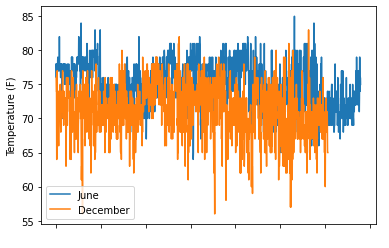

In [46]:
ax = june_temp_df.plot()
dec_temp_df.plot(ax=ax)
ax.legend(['June', 'December'])
ax.tick_params(axis='x', labelcolor='white')
ax.set_ylabel('Temperature (F)')
ax.figure.savefig('Resources/temp_graph.png')

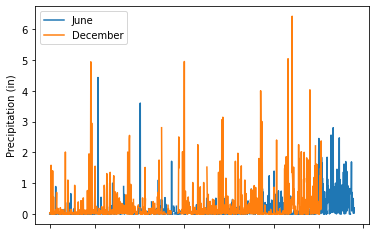

In [47]:
ax = june_prcp_df.plot()
dec_prcp_df.plot(ax=ax)
ax.legend(['June', 'December'])
ax.tick_params(axis='x', labelcolor='white')
ax.set_ylabel('Precipitation (in)')
ax.figure.savefig('Resources/prcp_graph.png')